### Tarea 5:
    
##### Universidad Nacional del Colombia

##### Juan Esteban Puyo Cubillos

###### Concepto general: 

Scikit-learn es una biblioteca de aprendizaje automático que proporciona una amplia gama de herramientas para el preprocesamiento de datos, la selección de modelos y la evaluación. Está diseñado para tareas de aprendizaje automático, como clasificación, regresión y agrupación.

Statsmodels es una biblioteca de análisis estadístico que proporciona una amplia gama de herramientas para el análisis de datos, incluida la regresión lineal, el análisis de series temporales y la prueba de hipótesis. Está diseñado para tareas de análisis estadístico, como prueba de hipótesis y ajuste de modelos.

### Exploración de scikit-learn (sklearn)

Escalamiento y codificacion para variables categoricas

En este caso, se está modificando la forma de iris.target de modo que pase de ser un arreglo unidimensional a un arreglo bidimensional con una sola columna. Esto es necesario para que el codificador (encoder) funcione correctamente, ya que espera un arreglo bidimensional como entrada.

In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.data)


from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
iris_encoded = encoder.fit_transform(iris.target.reshape(-1, 1))

print(iris_encoded)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (125, 2)	1.0
  (126, 2)	1.0
  (127, 2)	1.0
  (128, 2)	1.0
  (129, 2)	1.0
  (130, 2)	1.0
  (131, 2)	1.0
  (132, 2)	1.0
  (133, 2)	1.0
  (134, 2)	1.0
  (135, 2)	1.0
  (136, 2)	1.0
  (137, 2)	1.0
  (138, 2)	1.0
  (139, 2)	1.0
  (140, 2)	1.0
  (141, 2)	1.0
  (142, 2)	1.0
  (143, 2)	1.0
  (144, 2)	1.0
  (145, 2)	1.0
  (146, 2)	1.0
  (147, 2)	1.0
  (148, 2)	1.0
  (149, 2)	1.0


#### Regresión y clasificación

Regresión lineal simple utilizando linearregression cuyo objetivo es predecir la longitud del sépalo de una flor iris sepal length basándose en una sola característica, el ancho del pétalo petal width.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Iris
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target = data['sepal length (cm)']  # objetivo a predecir

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data[['petal width (cm)']], target, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

Error cuadrático medio (MSE): 0.16679303571495843


C:\ProgramData\anaconda3\envs\diplomado\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


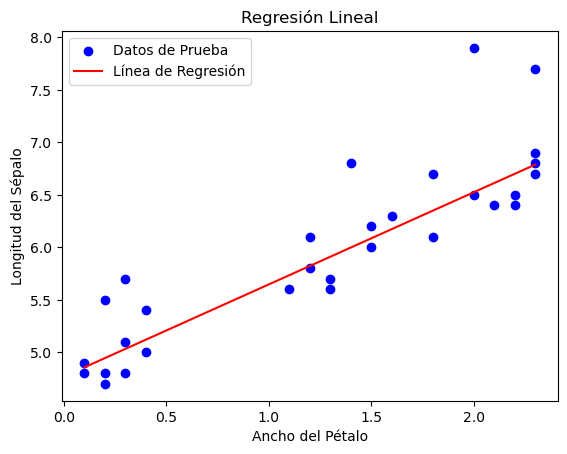

In [13]:
x_range = np.linspace(X_test.min(), X_test.max(), 100)

# Realizar predicciones en el rango de valores
y_range_pred = model.predict(x_range.reshape(-1, 1))

# Crear el gráfico de dispersión de los datos de prueba
plt.scatter(X_test, y_test, label='Datos de Prueba', color='blue')

# Crear la línea de regresión
plt.plot(x_range, y_range_pred, label='Línea de Regresión', color='red')

# Etiquetas y título
plt.xlabel('Ancho del Pétalo')
plt.ylabel('Longitud del Sépalo')
plt.title('Regresión Lineal')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

La clasificación se hace con máquinas de vector soporte, para el mismo conjunto de datos. En este caso intenta encontrar el limite de características para la clasificación.

Precisión del modelo SVM: 1.0
Matriz de confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



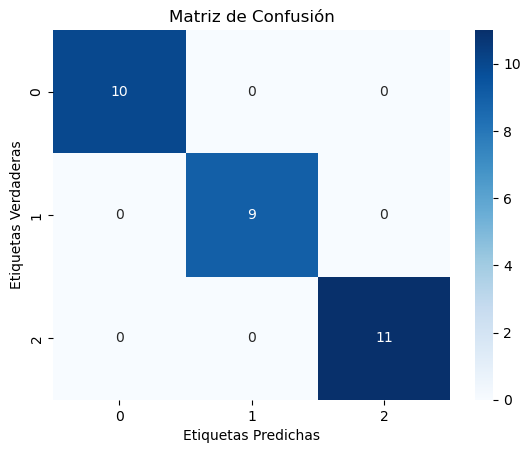

In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score, classification_report
from sklearn.svm import SVC


iris = datasets.load_iris()
X = iris.data
y = iris.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar un modelo SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Precisión del modelo SVM: {accuracy}")
print("Matriz de confusión:")
print(confusion)
print("Reporte de clasificación:")
print(report)

# Gráfico de matriz de confusión
sns.heatmap(confusion, annot=True, cmap='Blues')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

### Exploración de statsmodels:

Se utiliza el dataset de: https://www.geeksforgeeks.org/linear-regression-in-python-using-statsmodels/

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear un conjunto de datos de ejemplo
df  = pd.read_csv('headbrain11.csv')
df.head()

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


In [5]:
# Análisis de Regresión Lineal
# Crear el modelo de regresión lineal

df.columns = ['Head_size', 'Brain_weight']
model = smf.ols(formula='Head_size ~ Brain_weight', data=df)

# Ajustar el modelo
results_linear = model.fit()

In [6]:
# Interpretar resultados estadísticos
print("Análisis de Regresión Lineal:")
print(results_linear.summary())

Análisis de Regresión Lineal:
                            OLS Regression Results                            
Dep. Variable:              Head_size   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           5.96e-54
Time:                        23:29:31   Log-Likelihood:                -1613.4
No. Observations:                 237   AIC:                             3231.
Df Residuals:                     235   BIC:                             3238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      520

In [7]:
# pruebas de hipótesis 
print("Pruebas de hipótesis para Regresión Lineal:")
p_values = results_linear.pvalues
print(p_values)

Pruebas de hipótesis para Regresión Lineal:
Intercept       7.974425e-04
Brain_weight    5.957631e-54
dtype: float64


<Axes: xlabel='Brain_weight', ylabel='Head_size'>

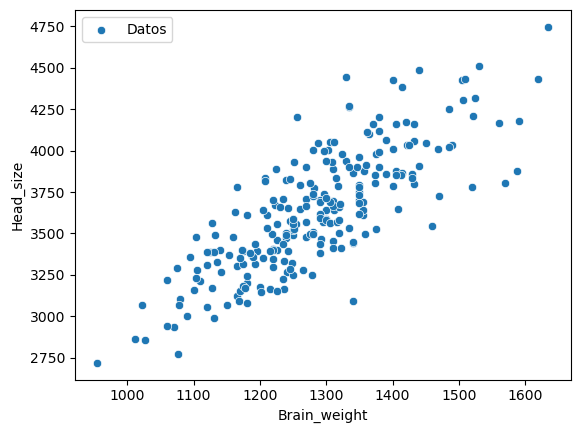

In [8]:
# Obtener los coeficientes de la regresión
coef_intercept = results_linear.params['Intercept']
coef_brain_weight = results_linear.params['Brain_weight']

# Crear un gráfico de dispersión
sns.scatterplot(data=df, x='Brain_weight', y='Head_size', label='Datos')

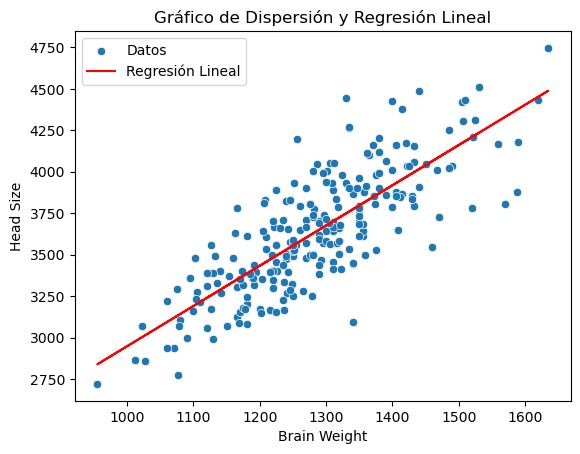

In [9]:
sns.scatterplot(data=df, x='Brain_weight', y='Head_size', label='Datos')
x = df['Brain_weight']
y_pred = coef_intercept + coef_brain_weight * x
plt.plot(x, y_pred, color='red', label='Regresión Lineal')

# Etiquetas y título
plt.xlabel('Brain Weight')
plt.ylabel('Head Size')
plt.title('Gráfico de Dispersión y Regresión Lineal')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

### Conclusiones

El presente trabajo expuso distintas formas de realizar modelos de regresión y clasificación, utilizando las librerias de aprendizaje supervisado en python scikit-learn (sklearn) y statsmodels.
Para ello, se utilizaron distintos modulos de las librerias cómo LinearRegression o SVC, que permiten hacer clasificaciones precisas para datasets sin correlación pensados específicamente para demostrar el funcionamiento de las librerías.
Durante el desarrollo se presentaron dificultades para realizar la matriz de confusión y encontrar métricas que informaran que el modelo funcionaba correctamente, ya que, por ejemplo, para el caso de la matriz de confusión, determinar la clase "positiva" y la clase "negativa" complica la interpretación del resultado. Sin embargo, métodos predefinidos como print(results_linear.summary()) aportan información importante para la toma de decisiones.